![example](images/director_shot.jpeg)

# MICROSOFT NEW STUDIO CREATION

**Authors:** Ariadna Recasens

## 1. Overview

Microsoft has decided to start a new film studio, but lack expertise in the field. In this project, we will explore different datasets obtained from 3 online databases of information related to film and provide insights to help Microsfot create top ranking movies. 


## 2. Business Problem


Microsoft wants to explore the trending of creating original video content and has decided to create a new movie studio. Still, there is a complete lack of expertise in the field. This case study will provide actionable insights to help the head of Microsoft's new movie studio decide what type of films to create.
***
Some of the questions that we will consider are:
* What films are currently doing the best at the box office?
* What do they have in common (e.g. genre?)
* Who is behind their production? 
* In which studios where they created? 
* What was their budget?
***

## 3. Data Understanding

This case study will explore data provided by some of the most reliable and well-know online database of information related to film:
* [IMDB](https://www.imdb.com/)
* [The Numbers](https://www.the-numbers.com/)
* [Box Office Mojo](https://www.boxofficemojo.com/)


***
In particular, we will use the following datasets:
* imdb.title.basics.csv.gz: 146144 entries with the following information: tconst, primary_title, original_title, start_year, runtime_minutes, genres.
* imdb.title.ratings: 73856 entries with the following information: tconst, averagerating, numvotes.
* imdb.name.basics.csv.gz: 606648 entries with the following information: nconst, primary_name, birth_year,  death_year, primary_profession, known_for_titles
* imdb.title.crew.csv.gz: 146144 entries with the following information: tconst, directors, writers.
* tn.movie_budgets.csv.gz: 5782 entries with the following information: id, release_date, movie, production_budget, domestic_gross, worldwide_gross.
* bom.movie_gross.csv.gz: 3387 entries with the following information: title, studio, domestic_gross, foreign_gross, year

Based on the questions provided in the business problem, the variable that we will focus are:
* Average ratings
* Total gross
* Studios that produced the top movies 
* Directors involved in top movies
* Budget

***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics 

%matplotlib inline

In [2]:
# Converting some of the csv files into panda dataframes

imdb_title = pd.read_csv('./data/zippedData/imdb.title.basics.csv.gz')
imdb_ratings = pd.read_csv('./data/zippedData/imdb.title.ratings.csv.gz')
imdb_names = pd.read_csv('./data/zippedData/imdb.name.basics.csv.gz') 
imdb_crew = pd.read_csv('./data/zippedData/imdb.title.crew.csv.gz') 
bom_gross = pd.read_csv('./data/zippedData/bom.movie_gross.csv.gz')
tn_movie = pd.read_csv('./data/zippedData/tn.movie_budgets.csv.gz')



### 3.1 Exploring databases using .info()

#### 3.1.1. Database imdb.title.basics
Below, we notice that only the columns runtime_minutes and genres have null values

In [3]:
imdb_title.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


#### 3.1.2. Database imdb.title.ratings
None of the columns have null values. We can ssee that the average rating is link to the id of the movie, not to the title. As such, we will have to join imdb_title and imdb_ratings to relate ratings with titles.

In [4]:
imdb_ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


#### 3.1.3. Database imdb.name.basics.csv.gz
Majority of the columns have null values. We can image that from this dataset we can get link name of the directors to their id (nconst)

In [5]:
imdb_names.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


#### 3.1.4. Database imdb.title.crew
Only of the columns have null values. We can imagine that from this dataset we will now the directors of each movie

In [6]:
imdb_crew.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


#### 3.1.5. Database bom.movie_gross
Unlike imdb datasets, this one gives us information about domestic and foreign gross. All columns except title have null values. We can notice that foreign_gross values are provided as object, instead of float values.

In [7]:
bom_gross.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### 3.1.6. Database tn.movie_budgets
Similar to bom database, this one also provides gross information. We can note from here that the gross values are provided as object, instead of int. 

In [8]:
tn_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### 3.2 Exploring databases using .head() and .value_counts()

#### 3.2.1. Database imdb.title.basics

In [9]:
imdb_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [10]:
imdb_title['tconst'].value_counts()

tt5138984    1
tt8933020    1
tt1720164    1
tt5158962    1
tt2338151    1
            ..
tt6793758    1
tt2775766    1
tt4201990    1
tt1331294    1
tt2615132    1
Name: tconst, Length: 146144, dtype: int64

**Observation:** each tconst have a unique value. IMDB website defines tconst as "alphanumer unique identifier of the title". As such, we will use tconst to merge title_basics and ratings

In [11]:
imdb_title['primary_title'].value_counts()


Home                                                              24
The Return                                                        20
Broken                                                            20
Alone                                                             16
Homecoming                                                        16
                                                                  ..
Paco de Lucía: A Journey                                           1
Geuk-jang-pan Kko-ma-beo-seu Ta-yo-ui E-i-seu Gu-chul-jak-jeon     1
Sepultura Endurance                                                1
Gun or Dance                                                       1
3-D Rarities                                                       1
Name: primary_title, Length: 136071, dtype: int64

**Observation:** IMDB website defines Primary title as follows: the more popular title / the title used by the filmmakers on promotional materials at the point of release

In [12]:
imdb_title['original_title'].value_counts()


Broken                                        19
Home                                          18
The Return                                    17
Alone                                         13
Homecoming                                    13
                                              ..
Survivance 2                                   1
Brasslands                                     1
The Owl                                        1
My Penance                                     1
Entre il et ailes - Devenir femme à 60 ans     1
Name: original_title, Length: 137773, dtype: int64

In [13]:
imdb_title['start_year'].value_counts()


2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

**Note:** How is it possible that the start year are beyon actual year? eg 2115

In [14]:
imdb_title['runtime_minutes'].value_counts()


90.0     7131
80.0     3526
85.0     2915
100.0    2662
95.0     2549
         ... 
382.0       1
724.0       1
808.0       1
287.0       1
540.0       1
Name: runtime_minutes, Length: 367, dtype: int64

In [15]:
imdb_title['genres'].value_counts()


Documentary                  32185
Drama                        21486
Comedy                        9177
Horror                        4372
Comedy,Drama                  3519
                             ...  
Adventure,Romance,Sport          1
Documentary,Musical,News         1
Crime,Music                      1
Documentary,Musical,Sport        1
Documentary,Horror,News          1
Name: genres, Length: 1085, dtype: int64

#### 3.2.2. Database imdb.ratings

In [16]:
imdb_ratings.head()


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [17]:
imdb_ratings['tconst'].value_counts()

tt1480662    1
tt3900738    1
tt7493770    1
tt3560798    1
tt5100542    1
            ..
tt1564367    1
tt1619887    1
tt8610794    1
tt2089788    1
tt5241950    1
Name: tconst, Length: 73856, dtype: int64

In [18]:
imdb_ratings['averagerating'].value_counts()

7.0     2262
6.6     2251
7.2     2249
6.8     2239
6.5     2221
        ... 
9.6       18
10.0      16
9.8       15
9.7       12
9.9        5
Name: averagerating, Length: 91, dtype: int64

In [19]:
imdb_ratings['numvotes'].value_counts()

6        2875
5        2699
7        2476
8        2167
9        1929
         ... 
18286       1
16289       1
1958        1
4007        1
4098        1
Name: numvotes, Length: 7349, dtype: int64

## 4. Data Preparation and Modelling

Our first objective is to know what are the films that are doing the best. After exploring our available datasents and understanding which information we have available, we will create two list based on:
* **Ratings**: using IMDB datasets
* **Total gross**: using TN and BOM datasets


We want to focus on recent movies, so we will only select the past 5 years movies. The data collected in our datasets cover films from up to 2019, so we will set our range between 2015-2019. 

Furthermore, we will set up a minium of votes (at least 25,000 following the IMDB guidelines) to make our list more reliable.

Since we want to create lists based on rating and total gross, we will omit the raws that have no values in those fields. 

### 4. 1 CREATION OF THE TOP20 HIGHEST-RATED MOVIES
To create this list, first we need to merge the imdb_title and imdb_ratings list, as they contained the titles and average rating movies respectively. 

In [20]:
# Merge imdb_title and imdb_ratins on tconst, which is an alphanumer unique identifier of the movie title.
#We merge using left join because imdb_title has more raws than ratings, and we want to maintain all the 
#information at the moment.

imdb_title_rating  = pd.merge(imdb_title, 
                              imdb_ratings, 
                              on=['tconst'], 
                              how='left') 


In [21]:
#We confirm that merging has been sucesfful

imdb_title_rating.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [22]:
imdb_title_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


**DATA CLEANING**
To create our list, we need to know the average rating of each movie, so we delete all the columns that have no averagerating:

In [23]:
imdb_title_rating.dropna(subset = ['averagerating'], inplace=True)

In [24]:
#We start exploring the movies with the highest average rating by sorting by "average rating" and applying .tail().

imdb_title_rating.sort_values('averagerating').tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
117359,tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5.0
71954,tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6.0
1857,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5.0
4016,tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",10.0,5.0
93040,tt5390098,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary,10.0,5.0


From the above table, we notince that those movies with a high averareating value have very low number of votes. In the IMDB website, they mentioned that minimum votes required to be listed in the Top Rated 250 list is currently 25,000 (More info in this link: https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#). 
We will follow the same strategy and delete all the movies with less than 25,000 votes.

In [25]:
#we want to delete the columns with less than 25000 votes
imdb_title_rating.drop(imdb_title_rating[imdb_title_rating['numvotes'] < 25000].index, inplace=True)


In [26]:
imdb_title_rating.sort_values('averagerating').tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
107713,tt6316138,Ayla: The Daughter of War,Ayla: The Daughter of War,2017,125.0,"Drama,History,War",8.7,26743.0
7066,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
72821,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",8.8,441135.0
43533,tt2592910,CM101MMXI Fundamentals,CM101MMXI Fundamentals,2013,139.0,"Comedy,Documentary",9.2,41560.0
99483,tt5813916,The Mountain II,Dag II,2016,135.0,"Action,Drama,War",9.3,100568.0


We will focus our studies in recent movies -> movies with less than 5 years. This data include movies from up to 2019, and as such, we will narrow our 5 years range between 2015 - 2019 (both inclusive)

In [27]:
#we create a list with the 25 movies between 2015 - 2019 that have the highest average rating

imdb_top20 = imdb_title_rating[imdb_title_rating['start_year'] >= 2015].sort_values('averagerating').tail(20)

In [28]:
imdb_top20

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
7213,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,2015,120.0,"Action,Adventure,Sci-Fi",8.1,780910.0
127087,tt7775622,Free Solo,Free Solo,2018,100.0,"Documentary,Sport",8.2,32250.0
85228,tt4934950,Talvar,Talvar,2015,132.0,"Crime,Drama,Mystery",8.2,25443.0
53866,tt3170832,Room,Room,2015,118.0,"Drama,Thriller",8.2,316791.0
86657,tt5027774,"Three Billboards Outside Ebbing, Missouri","Three Billboards Outside Ebbing, Missouri",2017,115.0,"Crime,Drama",8.2,344047.0
95481,tt5571734,Pink,Pink,2016,136.0,"Drama,Thriller",8.2,32238.0
28269,tt2096673,Inside Out,Inside Out,2015,95.0,"Adventure,Animation,Comedy",8.2,536181.0
117014,tt6966692,Green Book,Green Book,2018,130.0,"Biography,Comedy,Drama",8.3,204972.0
77309,tt4430212,Drishyam,Drishyam,2015,163.0,"Crime,Drama,Mystery",8.3,54991.0
83932,tt4849438,Baahubali 2: The Conclusion,Baahubali 2: The Conclusion,2017,167.0,"Action,Drama",8.3,65656.0


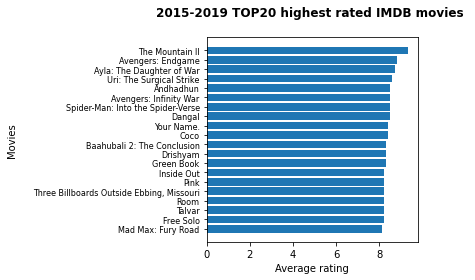

In [29]:
#Let's illustrate this list

x = imdb_top20['primary_title']
y = imdb_top20['averagerating']

fig, ax = plt.subplots()
plt.barh(x, y)
ax.set_ylabel('Movies\n')
ax.set_xlabel('Average rating')
ax.set_title('2015-2019 TOP20 highest rated IMDB movies \n', fontweight="bold")
plt.yticks(fontsize=8)
fig.tight_layout()
plt.savefig('./images/top20_IMDB_movies.png', bbox_inches = "tight")
plt.show();

Which insights can we get from this lis? For example, what are the most common genres? What is the average duration of the top 25 movies? 

Let's start with the **average duration of the top 25 IMDB movies**


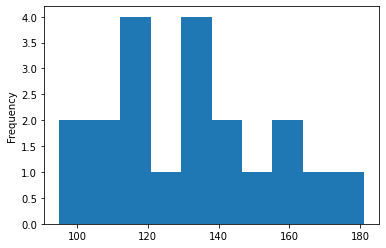

In [30]:
#we create a histogram of the duration, and observe that it doesn't follow a pure normal distribution, 
#so we will work with the median.

imdb_top20['runtime_minutes'].plot.hist();

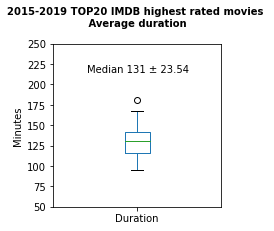

In [31]:
#We create a box plot with the duration ofthe movie
imdb_top20 = imdb_top20.rename(columns={'runtime_minutes': 'Duration'})


fig, ax = plt.subplots(figsize=(3, 3))
imdb_top20['Duration'].plot.box()
ax.set_title('2015-2019 TOP20 IMDB highest rated movies \n Average duration \n', fontweight="bold", size = 10)
ax.set_ylabel('Minutes')
plt.text(0.7, 215, 'Median 131 ± 23.54', fontsize = 10)  #this values come from the following action
plt.savefig('./images/top20_IMDB_duration.png', bbox_inches = "tight")
ax.set_ylim([50, 250]);

In [32]:
#Calculation of film duration median and stdev used for the graphic above

imdb_top20_duration_median = imdb_top20['Duration'].median()
imdb_top20_duration_stdev = statistics.stdev(imdb_top20['Duration'])

print(imdb_top20_duration_median)
print(imdb_top20_duration_stdev)

131.0
23.540334925847013


Now we move on to understand what are the **most common genres of the top 25 IMDB movies**


In [33]:
#first we extract all the genres into a pandas Series

genres = imdb_top20['genres'].map(lambda x: x.split(','))
type(genres)


pandas.core.series.Series

In [34]:
genres

7213         [Action, Adventure, Sci-Fi]
127087              [Documentary, Sport]
85228            [Crime, Drama, Mystery]
53866                  [Drama, Thriller]
86657                     [Crime, Drama]
95481                  [Drama, Thriller]
28269     [Adventure, Animation, Comedy]
117014        [Biography, Comedy, Drama]
77309            [Crime, Drama, Mystery]
83932                    [Action, Drama]
38424     [Adventure, Animation, Comedy]
91844        [Animation, Drama, Fantasy]
87402         [Action, Biography, Drama]
80655     [Action, Adventure, Animation]
72820        [Action, Adventure, Sci-Fi]
130754                 [Crime, Thriller]
132555              [Action, Drama, War]
107713             [Drama, History, War]
72821        [Action, Adventure, Sci-Fi]
99483               [Action, Drama, War]
Name: genres, dtype: object

In [35]:
#now we want to create a unique list with all the genres listed, and remove the "," so we have only a list of words
col_one_list = imdb_top20['genres'].tolist()

sent_str = ""
for x in col_one_list:
    sent_str += str(x) + ","

sent_str = sent_str.split(',')
sent_str

['Action',
 'Adventure',
 'Sci-Fi',
 'Documentary',
 'Sport',
 'Crime',
 'Drama',
 'Mystery',
 'Drama',
 'Thriller',
 'Crime',
 'Drama',
 'Drama',
 'Thriller',
 'Adventure',
 'Animation',
 'Comedy',
 'Biography',
 'Comedy',
 'Drama',
 'Crime',
 'Drama',
 'Mystery',
 'Action',
 'Drama',
 'Adventure',
 'Animation',
 'Comedy',
 'Animation',
 'Drama',
 'Fantasy',
 'Action',
 'Biography',
 'Drama',
 'Action',
 'Adventure',
 'Animation',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Crime',
 'Thriller',
 'Action',
 'Drama',
 'War',
 'Drama',
 'History',
 'War',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Drama',
 'War',
 '']

In [36]:
#now we want to count how many times each genre appears

from collections import Counter

counts_average = Counter(sent_str).most_common()
print(counts_average)
type(counts_average)

[('Drama', 12), ('Action', 8), ('Adventure', 6), ('Crime', 4), ('Animation', 4), ('Sci-Fi', 3), ('Thriller', 3), ('Comedy', 3), ('War', 3), ('Mystery', 2), ('Biography', 2), ('Documentary', 1), ('Sport', 1), ('Fantasy', 1), ('History', 1), ('', 1)]


list

In [37]:
#As we want to ilustrate this data, we will create one list for the names of the genres, and one list with the values

names = []
for x in counts_average:
    names.append(x[0])


values = []
for x in counts_average:
    values.append(x[1])

print(names)
print(values)

['Drama', 'Action', 'Adventure', 'Crime', 'Animation', 'Sci-Fi', 'Thriller', 'Comedy', 'War', 'Mystery', 'Biography', 'Documentary', 'Sport', 'Fantasy', 'History', '']
[12, 8, 6, 4, 4, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1]


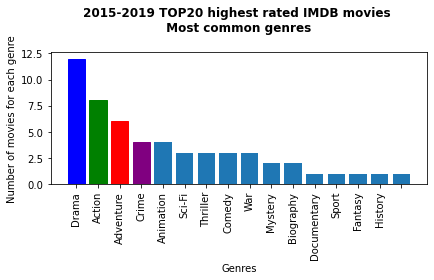

In [38]:
#now we can plot both lists, names and values

fig, ax = plt.subplots()
barlist=plt.bar(range(len(counts_average)), values, tick_label=names)
plt.xticks(rotation=90)
ax.set_ylabel('Number of movies for each genre')
ax.set_xlabel('Genres')
ax.set_title('2015-2019 TOP20 highest rated IMDB movies \n Most common genres \n', fontweight="bold")
barlist[0].set_color('blue')
barlist[1].set_color('green')
barlist[2].set_color('red')
barlist[3].set_color('purple')
fig.tight_layout()
plt.savefig('./images/top20_IMDB_genres.png', bbox_inches = "tight")
plt.show();



The graph above provides "static" information, it shows only the average of genre preferences during 2015-2019. But how did the preference for this genres changed across the past 5 years? Let's investigate it! 

In [39]:
# Before I had a list of list, with each item indicating the genre and the corresponding frequency (list named counts).
# Now I want to create a dictionary from this list, so I use this function

def Convert(lst):
    res_dct = {lst[i][0]: lst[i][1] for i in range(0, len(lst), 2)}
    return res_dct
         

In [40]:
#I test the function with the list of the top25 
counts_dict=(Convert(counts_average))
counts_dict

{'Drama': 12,
 'Adventure': 6,
 'Animation': 4,
 'Thriller': 3,
 'War': 3,
 'Biography': 2,
 'Sport': 1,
 'History': 1}

In [41]:
type(counts_dict)

dict

In [42]:
#Now let's check the value of Drama

print(counts_dict.get('Drama'))

12


Now we have undesrtand how to get the value of each genre. Let's repeat these operations for each year, between 2015 and 2019

In [43]:
imdb_top20_2017 = imdb_title_rating[imdb_title_rating['start_year'] == 2017].sort_values('averagerating').tail(20)
imdb_top20_2018 = imdb_title_rating[imdb_title_rating['start_year'] == 2018].sort_values('averagerating').tail(20)
imdb_top20_2019 = imdb_title_rating[imdb_title_rating['start_year'] == 2019].sort_values('averagerating').tail(20)
imdb_top20_2016 = imdb_title_rating[imdb_title_rating['start_year'] == 2016].sort_values('averagerating').tail(20)
imdb_top20_2015 = imdb_title_rating[imdb_title_rating['start_year'] == 2015].sort_values('averagerating').tail(20)

In [44]:
genres_2017 = imdb_top20_2017['genres'].map(lambda x: x.split(','))
genres_2018 = imdb_top20_2018['genres'].map(lambda x: x.split(','))
genres_2019 = imdb_top20_2019['genres'].map(lambda x: x.split(','))
genres_2016 = imdb_top20_2016['genres'].map(lambda x: x.split(','))
genres_2015 = imdb_top20_2015['genres'].map(lambda x: x.split(','))

In [45]:
col_one_list_2017 = imdb_top20_2017['genres'].tolist()
col_one_list_2018 = imdb_top20_2018['genres'].tolist()
col_one_list_2019 = imdb_top20_2019['genres'].tolist()
col_one_list_2016 = imdb_top20_2016['genres'].tolist()
col_one_list_2015 = imdb_top20_2015['genres'].tolist()



In [46]:
sent_str_2015 = ""
for x in col_one_list_2015:
    sent_str_2015 += str(x) + ","

sent_str_2015 = sent_str_2015.split(',')

In [47]:
sent_str_2016 = ""
for x in col_one_list_2016:
    sent_str_2016 += str(x) + ","

sent_str_2016 = sent_str_2016.split(',')

In [48]:
sent_str_2017 = ""
for x in col_one_list_2017:
    sent_str_2017 += str(x) + ","

sent_str_2017 = sent_str_2017.split(',')

In [49]:
sent_str_2018 = ""
for x in col_one_list_2018:
    sent_str_2018 += str(x) + ","

sent_str_2018 = sent_str_2018.split(',')

In [50]:
sent_str_2019 = ""
for x in col_one_list_2019:
    sent_str_2019 += str(x) + ","

sent_str_2019 = sent_str_2019.split(',')

In [51]:
#let's check that it has worked for 2015

counts_2015 = Counter(sent_str_2015).most_common()
print(counts_2015)


[('Drama', 13), ('Action', 6), ('Adventure', 5), ('Biography', 4), ('Comedy', 4), ('Crime', 4), ('Mystery', 3), ('History', 2), ('War', 2), ('Documentary', 2), ('Sci-Fi', 2), ('Thriller', 2), ('Music', 1), ('Romance', 1), ('Fantasy', 1), ('Animation', 1), ('', 1)]


In [52]:
#let's check that it has worked for 2016

counts_2016 = Counter(sent_str_2016).most_common()
print(counts_2016)


[('Drama', 16), ('Comedy', 7), ('Biography', 4), ('Action', 4), ('Adventure', 4), ('History', 3), ('Thriller', 3), ('Sci-Fi', 2), ('Mystery', 2), ('Music', 2), ('Animation', 2), ('Romance', 1), ('Crime', 1), ('Fantasy', 1), ('War', 1), ('', 1)]


In [53]:
#let's check that it has worked for 2017


counts_2017 = Counter(sent_str_2017).most_common()
print(counts_2017)


[('Drama', 13), ('Action', 7), ('Crime', 4), ('Adventure', 4), ('Comedy', 4), ('Mystery', 3), ('Biography', 2), ('Thriller', 2), ('Animation', 2), ('Family', 2), ('History', 2), ('Sci-Fi', 2), ('Horror', 1), ('Documentary', 1), ('Sport', 1), ('Romance', 1), ('War', 1), ('', 1)]


In [54]:
#let's check that it has worked for 2018 

counts_2018 = Counter(sent_str_2018).most_common()
print(counts_2018)


[('Drama', 11), ('Action', 6), ('Adventure', 6), ('Thriller', 4), ('Biography', 4), ('Comedy', 4), ('Music', 3), ('Sci-Fi', 3), ('Animation', 3), ('History', 2), ('Romance', 2), ('Crime', 2), ('Horror', 1), ('Mystery', 1), ('Documentary', 1), ('Sport', 1), ('', 1)]


In [55]:
#let's check that it has worked for 2019

counts_2019 = Counter(sent_str_2019).most_common()
print(counts_2019)


[('Adventure', 10), ('Action', 10), ('Drama', 6), ('Sci-Fi', 5), ('Comedy', 5), ('Biography', 4), ('Thriller', 4), ('Crime', 3), ('Family', 2), ('Fantasy', 2), ('Animation', 2), ('Horror', 1), ('Mystery', 1), ('Documentary', 1), ('Music', 1), ('War', 1), ('', 1)]


In [56]:
counts_dict_2015=dict(counts_2015)
counts_dict_2016=dict(counts_2016)
counts_dict_2017=dict(counts_2017)
counts_dict_2018=dict(counts_2018)
counts_dict_2019=dict(counts_2019)


In [57]:
#Let's check the values of drama for each year

print(counts_dict_2015.get('Drama'))
print(counts_dict_2016.get('Drama'))
print(counts_dict_2017.get('Drama'))
print(counts_dict_2018.get('Drama'))
print(counts_dict_2019.get('Drama'))

13
16
13
11
6


In [58]:
#We create a list with the drama values for each year:

drama_list = [counts_dict_2015.get('Drama'), counts_dict_2016.get('Drama'), counts_dict_2017.get('Drama'), counts_dict_2018.get('Drama'), counts_dict_2019.get('Drama')]

In [59]:
#we check that the drama_list contains the correct information

drama_list

[13, 16, 13, 11, 6]

In [60]:
##Let's repeat for Action

action_list = [counts_dict_2015.get('Action'), counts_dict_2016.get('Action'), counts_dict_2017.get('Action'), counts_dict_2018.get('Action'), counts_dict_2019.get('Action')]


In [61]:
##Let's repeat for Adventure

adventure_list = [counts_dict_2015.get('Adventure'), counts_dict_2016.get('Adventure'), counts_dict_2017.get('Adventure'), counts_dict_2018.get('Adventure'), counts_dict_2019.get('Adventure')]


In [62]:
##Let's repeat for Crime

crime_list = [counts_dict_2015.get('Crime'), counts_dict_2016.get('Crime'), counts_dict_2017.get('Crime'), counts_dict_2018.get('Crime'), counts_dict_2019.get('Crime')]


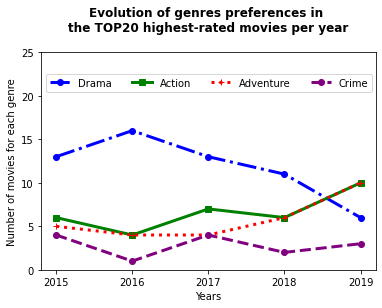

In [134]:
fig, ax = plt.subplots()
ax.plot(('2015','2016','2017','2018','2019'), drama_list , color="blue", lw=3, ls='-.', marker='o')
ax.plot(('2015','2016','2017','2018','2019'), action_list , color="green", lw=3, ls='-', marker='s')
ax.plot(('2015','2016','2017','2018','2019'), adventure_list , color="red", lw=3, ls=':', marker='+')
ax.plot(('2015','2016','2017','2018','2019'), crime_list , color="purple", lw=3, ls='--', marker='o')
ax.set_title('Evolution of genres preferences in \nthe TOP20 highest-rated movies per year\n', fontweight="bold")
ax.set_ylabel('Number of movies for each genre')
ax.set_xlabel('Years')
ax.set_ylim([0, 25]);
fig.legend(loc=(0.12,0.7), ncol = 4, labels=["Drama", "Action", "Adventure", "Crime"])
plt.savefig('./images/top20_IMDB_genres_dynamic.png', bbox_inches = "tight");


### 4. 1 CREATION OF THE TOP20 HIGHEST-RATED MOVIES
To create this list, we will use the following databases: bom_gross and tn.movie_budgets.

Let's start by refreshing what was in the bom_gross database:

In [64]:
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [65]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


First thing we can get from the information above, is that foreign_gross values are objects, and not float values such as domestic_gross.
To change gross values into float, first we delete the NaN values from that columns.

In [66]:
#We delete the rows that have no values in 'foreign_gross'

bom_gross.dropna(subset = ['foreign_gross'], inplace=True)

In [67]:
#Step to convert the value into float 

bom_gross["foreign_gross"] = [float(str(i).replace(",", "")) for i in bom_gross["foreign_gross"]]
bom_gross['foreign_gross'] = bom_gross['foreign_gross'].astype(float)


In [68]:
#Let's check that now we have forign_gross as float64

bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2037 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            2037 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 95.5+ KB


Let's start by calculating the **total gross**!

In [69]:
#We calculate global gross

bom_gross['total_gross'] = bom_gross['foreign_gross'] + bom_gross['domestic_gross']

In [70]:
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


Now that we have the total_Gross as a float value, we will **create the list of the top 20 movies with the highest total-gross**. Consistently with the other data exploration, we will focus with recent movies (i.e., from 2015). 

In [71]:
#Let's calculate what are the top 25 movies with the highest total_gross

gross_top20 = bom_gross[bom_gross['year'] >= 2015].sort_values('total_gross').tail(20)
gross_top20.dropna(subset = ['total_gross'], inplace=True)
gross_top20


,title,studio,domestic_gross,foreign_gross,year,total_gross
2762,Jumanji: Welcome to the Jungle,Sony,404500000.0,557600000.0,2017,9.621000e+08
2326,The Jungle Book (2016),BV,364000000.0,602500000.0,2016,9.665000e+08
2325,Zootopia,BV,341300000.0,682500000.0,2016,1.023800e+09
2324,Finding Dory,BV,486300000.0,542300000.0,2016,1.028600e+09
2761,Despicable Me 3,Uni.,264600000.0,770200000.0,2017,1.034800e+09
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,1.056100e+09
3083,Aquaman,WB,335100000.0,812700000.0,2018,1.147800e+09
2322,Captain America: Civil War,BV,408100000.0,745200000.0,2016,1.153300e+09
1876,Minions,Uni.,336000000.0,823400000.0,2015,1.159400e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09



Based on the information above, we could also extract **what are the studios that have created the top 20 movies**. 

In [72]:
#what are the studios of these top 25 movies? 

studios = dict(gross_top20['studio'].value_counts())
studios

{'BV': 10, 'Uni.': 3, 'WB': 1, 'Sony': 1}

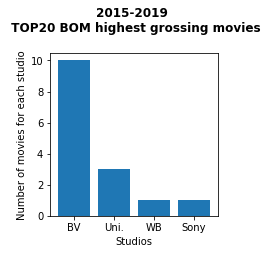

In [73]:
fig, ax = plt.subplots(figsize=(3, 3))
plt.bar(*zip(*studios.items()))
ax.set_ylabel('Number of movies for each studio')
ax.set_xlabel('Studios')
ax.set_title('2015-2019 \n TOP20 BOM highest grossing movies\n', fontweight="bold")
plt.savefig('./images/top20_IMDB_studios.png', bbox_inches = "tight")
plt.show();





Now that we have the top 20 BOM highest grossing movies list, let's start analyzing the data. In particular, we will foucs on the total_gross values. 

In [74]:
#let's calculate the total_Gross median and stdev/

gross_top20_SEM = statistics.stdev(gross_top20['total_gross'])
gross_top20_mean = statistics.median(gross_top20['total_gross'])


In [75]:
#let's make this values nicer, by presenting the value in millions (M) 

gross_top20_SEM_M=gross_top20_SEM/1000000
gross_top20_SEM_M

147.33663527866415

In [76]:
gross_top20_mean_M=gross_top20_mean/1000000
gross_top20_mean_M

1153.3

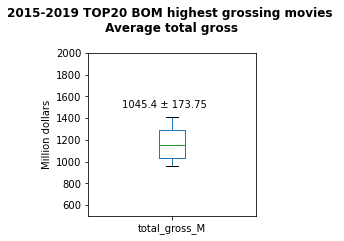

In [77]:
gross_top20['total_gross_M']=gross_top20['total_gross'] / 1000000


fig, ax = plt.subplots(figsize=(3, 3))
gross_top20['total_gross_M'].plot.box()
ax.set_title('2015-2019 TOP20 BOM highest grossing movies \n Average total gross \n', fontweight="bold")
ax.set_ylabel('Million dollars')
plt.text(0.7, 1500, '1045.4 ± 173.75', fontsize = 10)  #this values come from the following action
ax.set_ylim([500, 2000])
plt.savefig('./images/top20_BOM_totalgross_average.png', bbox_inches = "tight");

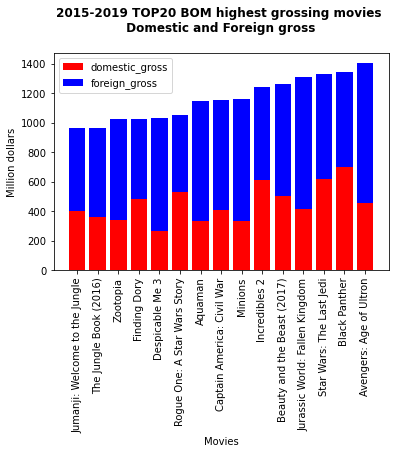

In [78]:
#Let's represent the total gross by illustrating both the domestic and foreign gross.

x = gross_top20['title']
y1 = gross_top20['domestic_gross']/1000000
y2 = gross_top20['foreign_gross']/1000000
  
# plot bars in stack manner
fig, ax = plt.subplots()
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
ax.set_ylabel('Million dollars')
ax.set_xlabel('Movies')
plt.legend(["domestic_gross", "foreign_gross"])


plt.xticks(rotation=90)
ax.set_title('2015-2019 TOP20 BOM highest grossing movies \n Domestic and Foreign gross \n', fontweight="bold")
plt.savefig('./images/top20_BOM.png', bbox_inches = "tight")
plt.show();

Now we are going to explore the other dataset that contains information about the gross values - **the TN dataset**.  

In [79]:
#Let's refresh what was in the tn_movie dataset
tn_movie.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [80]:
#we see that production_budget and gross values are objects, and we want to convert them into int. 
#so first we have to remove $ and ','

tn_movie['worldwide_gross_new'] = tn_movie['worldwide_gross'].str.replace('$', '')
tn_movie['worldwide_gross_new'] = tn_movie['worldwide_gross_new'].str.replace(',', '')


In [81]:
#let's check that now we have a value wihtout $ and/or ","

tn_movie.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_gross_new
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1045663875


In [82]:
#let's convert the gross value into a float

tn_movie['worldwide_gross_new'] = tn_movie['worldwide_gross_new'].astype(float)

In [83]:
#and we repeat the previous steps with production_budget, to convert the values into floats

tn_movie['production_budget_new'] = tn_movie['production_budget'].str.replace('$', '')
tn_movie['production_budget_new'] = tn_movie['production_budget_new'].str.replace(',', '')
tn_movie['production_budget_new'] = tn_movie['production_budget_new'].astype(float)

In [84]:
tn_movie.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_gross_new,production_budget_new
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2.776345e+09,425000000.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1.045664e+09,410600000.0


Now that we have the total_Gross as a float value, we will **create the list of the top 20 TN movies with the highest total-gross**. Consistently with the other data exploration, we will focus with recent movies (i.e., from 2015). For this purpose, we have to convert the release date into data times

In [85]:
tn_movie['release_date']=pd.to_datetime(tn_movie['release_date'])

In [86]:
#now let's select the top 25 tn highest grossing movies

tn_movie_top20 = tn_movie[tn_movie['release_date'].dt.year >= 2015].sort_values('worldwide_gross_new').tail(20)
tn_movie_top20

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_gross_new,production_budget_new
437,38,2017-12-20,Jumanji: Welcome to the Jungle,"$90,000,000","$404,508,916","$964,496,193",9.644962e+08,90000000.0
156,57,2016-03-04,Zootopia,"$150,000,000","$341,268,248","$1,019,429,616",1.019430e+09,150000000.0
45,46,2016-06-17,Finding Dory,"$200,000,000","$486,295,561","$1,021,215,193",1.021215e+09,200000000.0
629,30,2017-06-30,Despicable Me 3,"$75,000,000","$264,624,300","$1,034,727,750",1.034728e+09,75000000.0
44,45,2016-12-16,Rogue One: A Star Wars Story,"$200,000,000","$532,177,324","$1,049,102,856",1.049103e+09,200000000.0
95,96,2019-03-08,Captain Marvel,"$175,000,000","$426,525,952","$1,123,061,550",1.123062e+09,175000000.0
16,17,2016-05-06,Captain America: Civil War,"$250,000,000","$408,084,349","$1,140,069,413",1.140069e+09,250000000.0
135,36,2018-12-21,Aquaman,"$160,000,000","$335,061,807","$1,146,894,640",1.146895e+09,160000000.0
672,73,2015-07-10,Minions,"$74,000,000","$336,045,770","$1,160,336,173",1.160336e+09,74000000.0
22,23,2017-04-14,The Fate of the Furious,"$250,000,000","$225,764,765","$1,234,846,267",1.234846e+09,250000000.0


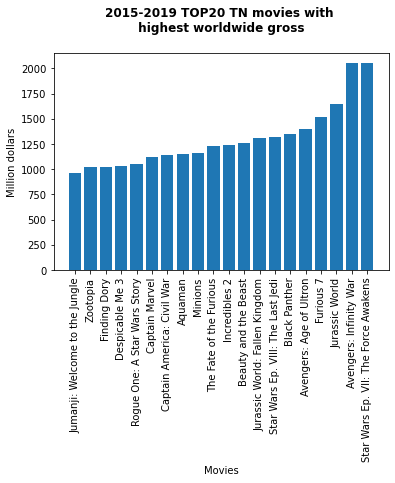

In [87]:
x = tn_movie_top20['movie']
y = tn_movie_top20['worldwide_gross_new']/1000000

fig, ax = plt.subplots()
plt.bar(x, y)
ax.set_ylabel('Million dollars')
ax.set_xlabel('Movies')
ax.set_title('2015-2019 TOP20 TN movies with \n highest worldwide gross \n', fontweight="bold")
plt.xticks(rotation=90)
plt.savefig('./images/top20_TN.png', bbox_inches = "tight")
plt.show();


Now that we have the top 20 TN highest grossing movies list, let's start analyzing the data. In this case, we will focus on the worldwide gross but also with the production budget, to see if we can gain some insights about the budget.

In [88]:
tn_movie_top20_budget_M_mean = tn_movie_top20['production_budget_new'].mean() / 1000000
tn_movie_top20_budget_M_stdev = statistics.stdev(tn_movie_top20['production_budget_new']) / 1000000
tn_movie_top20_gross_M_mean = tn_movie_top20['worldwide_gross_new'].mean() / 1000000
tn_movie_top20_gross_M_stdev = statistics.stdev(tn_movie_top20['worldwide_gross_new'])/ 1000000

print(tn_movie_top20_budget_M_mean)
print(tn_movie_top20_budget_M_stdev)
print(tn_movie_top20_gross_M_mean)
print(tn_movie_top20_gross_M_stdev)


200.63
75.43711985906924
1301.9344939500002
309.6066114942965


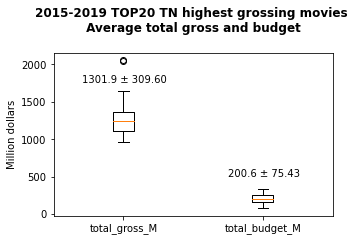

In [111]:
total_gross_M = tn_movie_top20['worldwide_gross_new']/1000000
total_budget_M = tn_movie_top20['production_budget_new']/1000000
fig, ax = plt.subplots(figsize=(5, 3))
plt.boxplot ([total_gross_M, total_budget_M])
ax.set_title('2015-2019 TOP20 TN highest grossing movies \n Average total gross and budget \n', fontweight="bold")
ax.set_ylabel('Million dollars')
plt.xticks([1, 2], ['total_gross_M', 'total_budget_M'])
plt.text(0.7, 1750, '1301.9 ± 309.60', fontsize = 10) #this values come from the following action;
plt.text(1.75, 500, '200.6 ± 75.43', fontsize = 10)
plt.savefig('./images/top20_TN_gross_budget.png', bbox_inches = "tight");  #this values come from the following action;

Let's check if there is a correlation between the total budget and the total gross. From the statistics below, we can see that there is a signficant correlation between budget and total gross (p<0.05), althought it doesn't follow a clear linear correlation. 

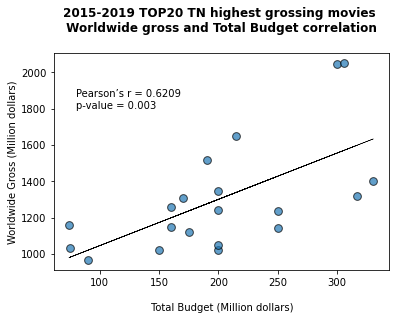

In [112]:
fig, ax = plt.subplots()

x = tn_movie_top20['production_budget_new'] / 1000000
y = tn_movie_top20['worldwide_gross_new']/ 1000000

# Graph X vs. Y as a scatter plot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,  color="black", lw=0.5)
ax.set_ylabel('Worldwide Gross (Million dollars)')
ax.set_xlabel('\n Total Budget (Million dollars)')
ax.set_title('2015-2019 TOP20 TN highest grossing movies \n Worldwide gross and Total Budget correlation \n', fontweight="bold")
plt.text(80, 1800, 'Pearson’s r = 0.6209 \np-value = 0.003', fontsize = 10)#this values come from the following action;;
plt.savefig('./images/top20_BOM_correlation.png', bbox_inches = "tight");




In [91]:
stats.pearsonr(tn_movie_top20['production_budget_new'], tn_movie_top20['worldwide_gross_new'])

#Pearson’s r 
#A p-value. This is the probability that the true value of r is zero (no correlation).



(0.6209169504424389, 0.0034820052718047665)

To provide more insights, we will investigate **who are the directors of these top10 highest grossing movies**. To do so, we will use the TN top 20 list, as it contains some top movies whose information was not present in the BOM dataset .

To link the name of the movies to their corresponding directors, we have to merge several datasets. In particular, we have to merge the tn_movie_top25 with the imdb datasets that contains all the information aobut movies and directors (ID and names). 

First, let's refresh what is contained in the tn_movie_top25 and in the imdb_title_rating datasets.

In [92]:
tn_movie_top20.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_gross_new,production_budget_new
437,38,2017-12-20,Jumanji: Welcome to the Jungle,"$90,000,000","$404,508,916","$964,496,193",9.644962e+08,90000000.0
156,57,2016-03-04,Zootopia,"$150,000,000","$341,268,248","$1,019,429,616",1.019430e+09,150000000.0


In [93]:
imdb_title_rating.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
48,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0


We can see that the commonality between these two datasets is the name of the movies. However, they are labelled in a different way. The tn_movie_25 described the title as "movie", whicle the imdb_title_rating describes it as a "original_title". As such, first we need to rename the columsn so that they match.

In [94]:
#To merge both datasets, first we have to change the name of the column that we want to merge, 
#so it has a consistent name.

tn_movie_top20 = tn_movie_top20.rename(columns={'movie': 'original_title'})
tn_movie_top20.head(2)

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross,worldwide_gross_new,production_budget_new
437,38,2017-12-20,Jumanji: Welcome to the Jungle,"$90,000,000","$404,508,916","$964,496,193",9.644962e+08,90000000.0
156,57,2016-03-04,Zootopia,"$150,000,000","$341,268,248","$1,019,429,616",1.019430e+09,150000000.0


In [95]:
#now we merge both datasets using the original_title column, with an inner joint
gross_director_1  = pd.merge(tn_movie_top20, 
                              imdb_title_rating, 
                              on=['original_title'], 
                              how='inner') 

In [96]:
#let's see what information we have in the other databaes to match movies, with directors id and names

imdb_crew.head(2)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"


In [97]:
imdb_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


Now we will join the dataset that contains information about movies AND directors: the imdb_crew dataset. In this dataset, the director is only identificed with the code tconst (and not the name)

In [98]:
#now we want to join the imdb dataset that contains the directors informaiton
gross_director_2  = pd.merge(gross_director_1, 
                              imdb_crew, 
                              on=['tconst'], 
                              how='inner') 

In [99]:
#if we have a look to our new datset, we can see that some movies have more than one director, 
#and that some directors appear multiple time

gross_director_2.head(2)

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross,worldwide_gross_new,production_budget_new,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
0,38,2017-12-20,Jumanji: Welcome to the Jungle,"$90,000,000","$404,508,916","$964,496,193",9.644962e+08,90000000.0,tt2283362,Jumanji: Welcome to the Jungle,2017,119.0,"Action,Adventure,Comedy",7.0,242735.0,nm0440458,"nm0571344,nm1273099,nm0003298,nm0684374,nm0885..."
1,57,2016-03-04,Zootopia,"$150,000,000","$341,268,248","$1,019,429,616",1.019430e+09,150000000.0,tt2948356,Zootopia,2016,108.0,"Adventure,Animation,Comedy",8.0,383446.0,"nm1158544,nm0397174,nm0601781","nm0397174,nm0601781,nm1158544,nm0714114,nm2888..."


In [100]:
gross_director_2['directors'].value_counts()


nm0751577,nm0751648              2
nm0281396,nm1349818              1
nm1490123                        1
nm0440458                        1
nm3363032                        1
nm0004056,nm0533691              1
nm0049633,nm3210494,nm1853544    1
nm1853544,nm0049633              1
nm0923736                        1
nm0174374                        1
nm1291105                        1
nm0336620                        1
nm1158544,nm0397174,nm0601781    1
nm0083348                        1
nm1119880                        1
Name: directors, dtype: int64

In [101]:
#To further explore the data, we want to create a list with all the directors id

col_one_directors = gross_director_2['directors'].tolist()

sent_str = ""
for x in col_one_directors:
    sent_str += str(x) + ","

directors_str = sent_str.split(',')
directors_str

['nm0440458',
 'nm1158544',
 'nm0397174',
 'nm0601781',
 'nm0004056',
 'nm0533691',
 'nm0049633',
 'nm3210494',
 'nm1853544',
 'nm0281396',
 'nm1349818',
 'nm0751577',
 'nm0751648',
 'nm1490123',
 'nm1853544',
 'nm0049633',
 'nm0336620',
 'nm0083348',
 'nm0174374',
 'nm1291105',
 'nm3363032',
 'nm0923736',
 'nm1119880',
 'nm0751577',
 'nm0751648',
 '']

In [102]:
#we explore whether a director appears in more than one movie, by using the counter function

directors = Counter(directors_str).most_common()
print(directors)
type(directors)

[('nm0049633', 2), ('nm1853544', 2), ('nm0751577', 2), ('nm0751648', 2), ('nm0440458', 1), ('nm1158544', 1), ('nm0397174', 1), ('nm0601781', 1), ('nm0004056', 1), ('nm0533691', 1), ('nm3210494', 1), ('nm0281396', 1), ('nm1349818', 1), ('nm1490123', 1), ('nm0336620', 1), ('nm0083348', 1), ('nm0174374', 1), ('nm1291105', 1), ('nm3363032', 1), ('nm0923736', 1), ('nm1119880', 1), ('', 1)]


list

In [103]:
directors[0][0]

'nm0049633'

In [104]:
#let's refresh what is in the last table that we want to join to get the name of the directors
imdb_names.head(2)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In [105]:
imdb_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [106]:
#now we want to create a new table that will containt the id of each director (which measn the nconst) and 
#the number of times that the director has appeared in the top25 tn highest grossing movies

const_directors = []
for x in directors:
    const_directors.append(x[0])


repetitions_directors = []
for x in directors:
    repetitions_directors.append(x[1])


In [107]:
#let's create the dataframe

d = {'directors':const_directors,'repetition':repetitions_directors}
df_directors = pd.DataFrame(d)

df_directors = df_directors.rename(columns={'directors': 'nconst'})
df_directors

,nconst,repetition
0,nm0049633,2
1,nm1853544,2
2,nm0751577,2
3,nm0751648,2
4,nm0440458,1
5,nm1158544,1
6,nm0397174,1
7,nm0601781,1
8,nm0004056,1
9,nm0533691,1


Now we have created a list with the directors of the top20 TN highest grossing movies and with the number of movies that they have directed. But we are still missing the names of the directors (we only have their identifiers). The next step is to merge the IMDB dataset that contains the directors identifier and names

In [108]:
#and now we can merge our new database with the name of the directors

gross_director_3  = pd.merge(df_directors, 
                              imdb_names, 
                              on=['nconst'], 
                              how='inner') 
gross_director_3

,nconst,repetition,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0049633,2,Kyle Balda,1971.0,NaN,"director,animation_department,visual_effects","tt2293640,tt1482459,tt0116996,tt3469046"
1,nm1853544,2,Pierre Coffin,1967.0,NaN,"actor,director,producer","tt1690953,tt2293640,tt3469046,tt1323594"
2,nm0751577,2,Anthony Russo,1970.0,NaN,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796"
3,nm0751648,2,Joe Russo,1971.0,NaN,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820"
4,nm0440458,1,Jake Kasdan,1974.0,NaN,"producer,director,actor","tt1956620,tt0120906,tt0473709,tt0841046"
5,nm1158544,1,Jared Bush,1974.0,NaN,"writer,miscellaneous,producer","tt3521164,tt2948356,tt0161081,tt0362404"
6,nm0397174,1,Byron Howard,1968.0,NaN,"animation_department,director,actor","tt0398286,tt0328880,tt2948356,tt0397892"
7,nm0601781,1,Rich Moore,1963.0,NaN,"miscellaneous,director,art_department","tt2948356,tt5848272,tt1772341,tt0149460"
8,nm0004056,1,Andrew Stanton,1965.0,NaN,"writer,actor,producer","tt0120623,tt0266543,tt2277860,tt0910970"
9,nm0533691,1,Angus MacLane,NaN,NaN,"animation_department,actor,writer","tt0910970,tt0317705,tt2446040,tt2277860"


In [109]:
#Let's make the table look nicer by deleting some columns

gross_director_4 = gross_director_3.drop(['nconst','birth_year', 'death_year','primary_profession', 'known_for_titles'], axis = 1)
gross_director_4 = gross_director_4.rename(columns={'primary_name': 'Director', 'repetition' : 'number_Top25_movies'})
gross_director_4

,number_Top25_movies,Director
0,2,Kyle Balda
1,2,Pierre Coffin
2,2,Anthony Russo
3,2,Joe Russo
4,1,Jake Kasdan
5,1,Jared Bush
6,1,Byron Howard
7,1,Rich Moore
8,1,Andrew Stanton
9,1,Angus MacLane


And finally, **let's illustrate this data**!

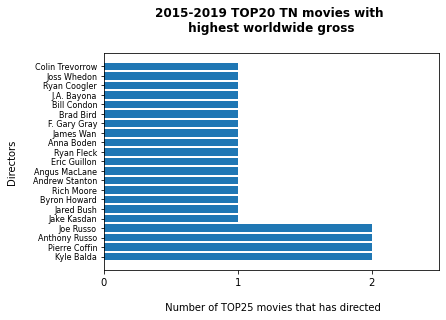

In [113]:
x = gross_director_4['Director']
y = gross_director_4['number_Top25_movies']

fig, ax = plt.subplots()
plt.barh(x, y)
ax.set_ylabel('Directors\n')
ax.set_xlabel('\n Number of TOP25 movies that has directed')
ax.set_title('2015-2019 TOP20 TN movies with \n highest worldwide gross \n', fontweight="bold")
plt.yticks(fontsize=8)
plt.xlim([0, 2.5])
plt.xticks(np.arange(0, 2.5, 1))
plt.savefig('./images/top20_TN_directors.png', bbox_inches = "tight");

## Evaluation

In this project, we have created 3 lists:
- Top20 iMDB highest rated movies
- Top20 TN highest grossing movies
- Top20 BOM highest grossing movies

Summary of the main findings:
* Average duration of highest-rated movies is 131.0 minutes ± 23.54 minutes.
* Most common genres in top20 IMDB highest rated movies between 2015-2019 are Drama, Action, Adventure, Crime. 
* The preference for drama is declining; Action and Adventure are increasing; and Crime reamins stable.
* The studies that created the top20 highest rating movies are BV, Uni, Sony, WB and Fox.
* The top20 TN highest grossing movies had a production budget average of \\$200.6M ± \\$75.43M.
* There is a signficant correlation (p < 0.05) between budget and worldwide gross.
* The directors behing the top20 highest grossing movies are: Pierre Coffin, Anthony Russo, Joe Russo, Jake Kasdan, Jared Bush, Byron Howard, Rich Moore, Andrew Stanton, Angus MacLane, Eric Guillon, Ryan Fleck, Anna Boden, James Wan, F. Gary Gray, Brad Bird, Bill Condon, J.A. Bayona, Ryan Coogler, Joss Whedon, Colin Trevorrow.


Evaluation: the top20 TN and top20 BOM lists provide similar results, which is an indicative of the robustness of our case-study. 

The fact that we used datasets from 3 different resources (BOM, TN, IMDB) containg large amounts of data increase the conficence of our results.  


## Conclusions

We provide the following business recomendations:

* The duration of the movies to be produced by Microsoft studio whould be around 131.0 minutes ± 23.54 minutes. 
* The new Microsoft movies should classified as Action, Adventure, Drama and/or Crime.
* The new Microsoft movies should have the following studios as references: BV, Uni, Sony, WB and Fox.
* The new Microsoft movies should have an available production budget of \\$200.6M ± \\$75.43M.
* The new Microsoft studio should contact some of the following directors: Pierre Coffin, Anthony Russo, Joe Russo, Jake Kasdan, Jared Bush, Byron Howard, Rich Moore, Andrew Stanton, Angus MacLane, Eric Guillon, Ryan Fleck, Anna Boden, James Wan, F. Gary Gray, Brad Bird, Bill Condon, J.A. Bayona, Ryan Coogler, Joss Whedon, Colin Trevorrow.

Further steps: to analyze the datasets containing the critics comments. We can gain more insights by knowing what the experts in the field (the critics)think. We can also do some studies based on regions, to create movies targeting those countries. 
***